# Support Vector Regressor Implementation

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
from sklearn.datasets import make_regression

In [4]:
x,y = make_regression(n_samples = 1000,n_features = 2,n_targets = 1,noise = 3.0)

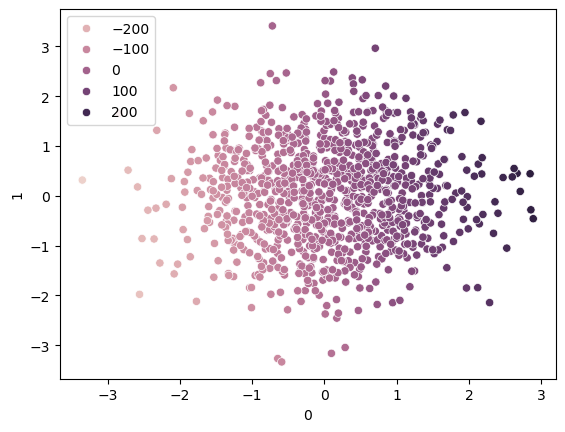

In [8]:
sns.scatterplot(x = pd.DataFrame(x)[0],y = pd.DataFrame(x)[1],hue = y)
plt.show()

In [9]:
# spliting the dataset into train and test data
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state = 42)

In [11]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((750, 2), (250, 2), (750,), (250,))

In [13]:
# Model Training
from sklearn.svm import SVR
svr = SVR(kernel = 'linear')

In [14]:
svr.fit(x_train,y_train)

SVR(kernel='linear')

In [15]:
y_pred = svr.predict(x_test)

In [16]:
# Checking accuracy
from sklearn.metrics import r2_score

In [17]:
print(r2_score(y_pred,y_test))

0.9985700020339537


In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
parameter = {
    "C":[0.1,1,10,100,1000],
    "gamma":[1,0.1,0.01,0.001,0.0001],
    'kernel':['linear'],
    'epsilon':[0.1,0.2,0.3]}

In [34]:
reg = GridSearchCV(svr, param_grid=parameter,refit = True, cv = 5, verbose = 3)

In [35]:
reg.fit(x_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.797 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.800 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.805 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.804 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.798 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.797 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.800 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.805 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.804 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.798 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

GridSearchCV(cv=5, estimator=SVR(kernel='linear'),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [37]:
y_pred = reg.predict(x_test)

In [38]:
# checking accuracy
from sklearn.metrics import r2_score

In [39]:
print(r2_score(y_pred,y_test))

0.9986842713177073
